# Import libraries as we go

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import contractions
from collections import Counter

# Load all the required datasets as we go

In [2]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("data/kalki_movie_reviews.csv")
df.head()

,Comments,Ratings
0,"I didnt go in with big hopes, but i was expect...",8
1,"A unique genre, a well written story (script) ...",8
2,"Majestic at scale, grandeur in VFX, and great ...",9
3,"""Kalki 2898"" is not just a movie; it's an expe...",10
4,Best Indian movie Nagi combined Hindu mytholog...,10


In [4]:
df.Ratings.describe()

count    5000.000000
mean        8.160000
std         2.166873
min         1.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: Ratings, dtype: float64

In [5]:
stwords = set(stopwords.words("English"))
stwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

# Functions used to clean the text data and make it useable

In [6]:
def textCleaner(text:str) -> str:
    text = text.lower()
    text = contractions.fix(text)
    text = re.sub(r"[^a-z\s]", "", text)
    token = word_tokenize(text)
    text = [w for w in token if w not in stwords]
    return text

In [7]:
textCleaner("Apple is a fruit")

['apple', 'fruit']

In [19]:
def plotCustom(data = df):
    sns.countplot(x="Ratings", data=df)
    plt.title("Rating Distribution")
    plt.show()

    sns.histplot(df["review_Length"], bins=10, kde=True)
    plt.title("Distribution of review length in data")
    plt.show()

In [9]:
df["tokens"] = df["Comments"].apply(textCleaner)
df["review_Length"] = df["tokens"]. apply(len)

In [10]:
df.head(10)

,Comments,Ratings,tokens,review_Length
0,"I didnt go in with big hopes, but i was expect...",8,"[go, big, hopes, expecting, better, adipurush,...",211
1,"A unique genre, a well written story (script) ...",8,"[unique, genre, well, written, story, script, ...",81
2,"Majestic at scale, grandeur in VFX, and great ...",9,"[majestic, scale, grandeur, vfx, great, blend,...",117
3,"""Kalki 2898"" is not just a movie; it's an expe...",10,"[kalki, movie, experience, redefines, boundari...",270
4,Best Indian movie Nagi combined Hindu mytholog...,10,"[best, indian, movie, nagi, combined, hindu, m...",63
5,The Kalki 2898 AD movie is an epic dystopian s...,10,"[kalki, ad, movie, epic, dystopian, science, f...",65
6,#NagAshwin dreams big and manages to execute t...,10,"[nagashwin, dreams, big, manages, execute, spe...",168
7,The soaring epicness of second part of the fil...,6,"[soaring, epicness, second, part, film, excell...",62
8,"Let me share a review of the movie ""Kalki 2898...",9,"[let, share, review, movie, kalki, ad, directe...",171
9,I don't understand the obsession with hero ent...,6,"[understand, obsession, hero, entry, people, g...",52


In [13]:
all_token = [token for tokens in df["tokens"] for token in tokens]
wordFreq = Counter(all_token)

print(f"Most Frequent words: {wordFreq.most_common(20)}")

Most Frequent words: [('movie', 9200), ('film', 7200), ('story', 6000), ('kalki', 5200), ('prabhas', 4800), ('like', 4600), ('good', 4600), ('amitabh', 3800), ('characters', 3600), ('scenes', 3400), ('indian', 3400), ('nag', 3400), ('character', 3200), ('action', 3000), ('bachchan', 3000), ('ashwin', 3000), ('half', 2800), ('world', 2800), ('first', 2600), ('vfx', 2600)]


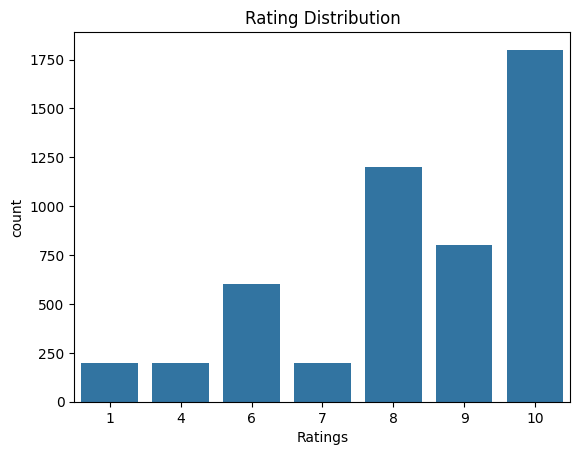

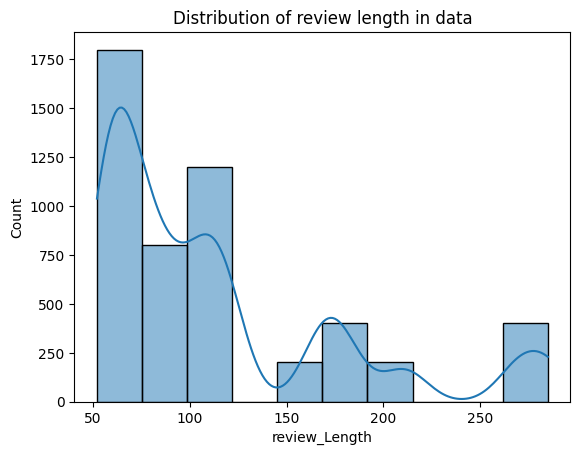

In [20]:
plotCustom(df)

## Spacy Analysis

In [21]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(df["Comments"].iloc[0])
print([(ent.text, ent.label_) for ent in doc.ents]) 
print([(token.text, token.pos_) for token in doc[:20]])

[('2D(i', 'CARDINAL'), ('London', 'GPE'), ('the first half', 'DATE'), ('Prabhas', 'GPE'), ('intro', 'PERSON'), ('Amitabh', 'PERSON'), ('Abhishek', 'PERSON'), ('Amitabh', 'PERSON'), ('one', 'CARDINAL'), ('Prabhas', 'GPE'), ('Disha', 'GPE'), ('1', 'CARDINAL'), ('Prabhas', 'GPE'), ('60-70%', 'PERCENT'), ('second', 'ORDINAL'), ('Bhairava', 'PERSON'), ('Aswathamma', 'GPE'), ('Mahabharat', 'NORP'), ('second', 'ORDINAL')]
[('I', 'PRON'), ('did', 'AUX'), ('nt', 'PART'), ('go', 'VERB'), ('in', 'ADP'), ('with', 'ADP'), ('big', 'ADJ'), ('hopes', 'NOUN'), (',', 'PUNCT'), ('but', 'CCONJ'), ('i', 'PRON'), ('was', 'AUX'), ('expecting', 'VERB'), ('better', 'ADJ'), ('than', 'ADP'), ('Adipurush-', 'PROPN'), ('this', 'PRON'), ('was', 'AUX'), ('way', 'ADV'), ('better', 'ADJ')]


### Sentimental Angle

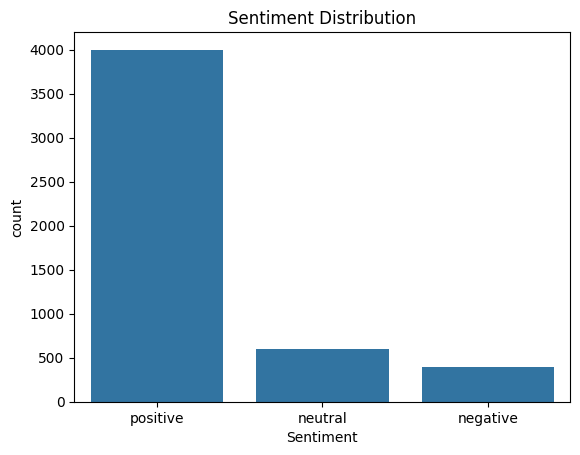

In [23]:
df["Sentiment"] = df["Ratings"].apply(
    lambda x: "positive" if x >= 7 else ("negative" if x <= 4 else "neutral")
)

sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

***Conclusion:***

The movie was received mostly positively and barely any poeple dislike the movie.